# 파이썬으로 하는 데이터 시각화 - 단어 관계도

## 단어 관계도 시각화
### 오늘의 분석 방법 - 한 문장에 동시출현(Co-occurrence)한 두 단어의 빈도를 계산
* 가장 기초적인 단어 관계 분석법
* 실제 현업(?)에서는 머신러닝, 딥러닝을 활용한 분석법을 사용한다고 함
 
### 사용할 라이브러리
* numpy
* networkx (https://networkx.github.io/documentation/stable/reference/introduction.html)
* matplotlib

#### 파일 열기 -  https://www.w3schools.com/python/python_file_open.asp

## 1. 데이터 처리 - 연설문의 명사 추출하기

In [2]:
speech = []
with open('../wordcloud/moon_speech.txt', 'r', encoding='utf-8') as t:
#     print(t)
    speech = t.read().splitlines()
    
# print(speech[0])
#     print(type(t.read()))
# print(speech)

In [2]:
speech = [line for line in speech if line != '' and line != ' ']

# print(speech)

### KoNLPy를 이용한 한글 형태소 분석

http://konlpy.org/

#### KoNLPy 패키지에 있는 komoran 형태소 분석기 사용
https://github.com/shineware/KOMORAN
* POS = Part Of Speech
* 품사표 : https://docs.komoran.kr/firststep/postypes.html

In [3]:
from konlpy.tag import Komoran
tagger = Komoran()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
# speech[1]

# tags = tagger.pos(speech[1])
# print(tags)

tagged_speech = [tagger.pos(line) for line in speech]

# print(tagged_speech)

# tagged_speech = [ word for word, tag in sent for sent in tagged_speech ]

# tagged_speech2 = []

# for sent in tagged_speech:
#     sentence = []
#     for word, tag in sent:
#         if word != '국민':
#             sentence.append(word, tag)
        
# import pprint
# pprint.pprint(tagged_speech)

# for line in speech
# tagged_speech = [tagger.pos(line) for line in speech]




In [5]:
# 연설문의 명사 추출하기
speech_nouns = []

for sentence in tagged_speech:
    for word, tag in sentence:
        if tag in ['NNP', 'NNG']: # tag == 'NNP' or tag == 'NNG'
            speech_nouns.append(word)

# print(speech_nouns)

## 2. 단어 관계도 시각화

In [7]:
## 관계도 분석하기

# set을 통해 명사 추출 (https://wikidocs.net/1015)

unique_nouns = set() # list = []

# 명사 추출하기
for sent in tagged_speech:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word) # list.add(word)

# print(unique_nouns)

unique_nouns = list(unique_nouns)
# print(unique_nouns)

unique_nouns = [word for word in unique_nouns if word not in ['국민', '여러분']]
                                           

In [8]:
noun_index = { noun: i for i, noun in enumerate(unique_nouns) }

# print(noun_index)

# noun_index
# print(noun_index)

In [9]:
import numpy as np

# print(len(speech), len(unique_nouns))

#             unique_nouns
#             경제 한반도 단어1 단어2 ~ 
# senstence1  1 0 0 0 0 0 ~
# senstence2  0 0 0 0 0 0 ~
#             0 0 0 0 0 0 ~

occurs = np.zeros([len(speech), len(unique_nouns)])

# print(occurs)

# shaped = np.shape(occurs)

# print(shaped)

# for i, sent in enumerate(speech):
#     print(i, sent)

for i, sent in enumerate(tagged_speech):
    for word, tag in sent:
        if tag in ['NNP', 'NNG'] and word not in ['국민', '여러분']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] += 1  # 문장 i의 index 자리에 1을 채워 넣는다.
                
co_occurs = occurs.T.dot(occurs) 

# print(co_occurs)

In [10]:
import networkx as nx

graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 26:
            graph.add_edge(unique_nouns[i], unique_nouns[j])

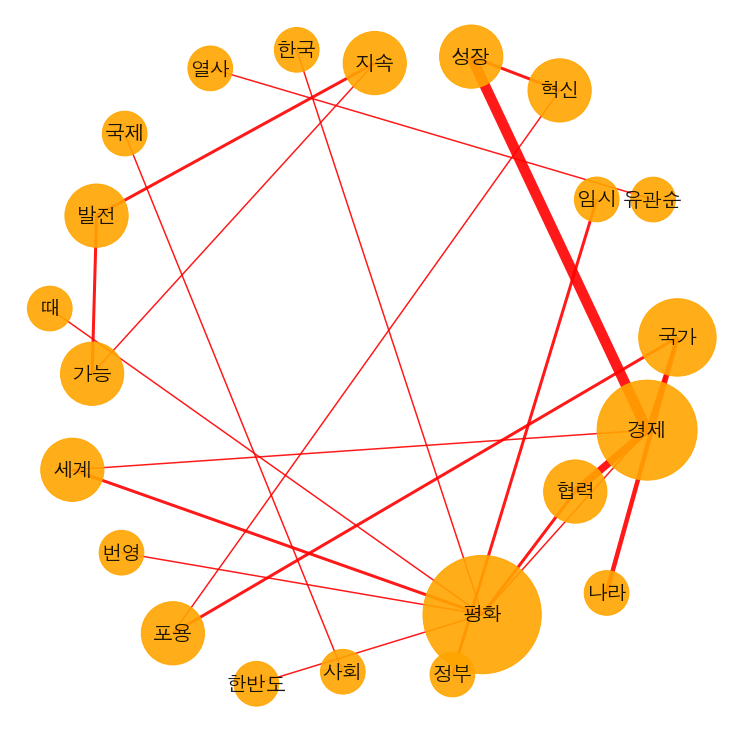

In [12]:
d = dict(graph.degree)

# print(d)

import matplotlib.pyplot as plt  

# 그래프 그리기
plt.figure(figsize=(10, 10))

layout = nx.spring_layout(graph, k=3 )

# 노드, 엣지 시각화 방식 설정
nx.draw(graph, 
        pos=layout, 
        with_labels=True,
        font_size= 20, 
        font_family="AppleGothic",
        alpha=0.9, 
        node_size= [value * 2000 for value in d.values()],
        width = [value * 1.5 for value in d.values()],
        edge_color = 'red',
        node_color = 'orange')

plt.show()